<a href="https://colab.research.google.com/github/ramadhanbay/kuliah/blob/main/UTS_SinarBayuRamadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Machine Learning**

Sinar Bayu Ramadhan (01679220015@student.uph.edu)

Contoh kasus menggunakan google collab untuk Random Forest menggunakan data mobil bekas yang diambil dari https://atapdata.ai/dataset/231/harga_mobil_bekas

## install dan import

In [284]:
%pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, explained_variance_score
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import math

## preparation data

In [286]:
url_train = 'https://raw.githubusercontent.com/ramadhanbay/kuliah/main/dataset/cars.csv'
data_train = pd.read_csv(url_train, low_memory=False)
data_train.head(3)

,id,title,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,image,place,price
0,42431,2014 BMW 320i 2.0 Sport Sedan,BMW,320i,Sport,Pertamax,Sedan,Automatic,5,2014,32500,Putih,https://img3.icarcdn.com/0782846/thumb-l_used-...,Tangerang,365000000
1,24089,2015 Mitsubishi Pajero Sport 2.5 Exceed SUV,Mitsubishi,Pajero Sport,Exceed,Solar,SUV,Automatic,7,2015,41000,Putih,https://img2.icarcdn.com/3144016/thumb-l_used-...,Gresik,305000000
2,33485,2016 Daihatsu Gran Max 1.3 D Van,Daihatsu,Gran Max,D,Pertamax,Van,Manual,8,2016,58000,Silver,https://img1.icarcdn.com/7813926/thumb-l_used-...,Blitar,102500000


In [287]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
data_train = data_train.drop(['id','title','image'], axis=1)
print('The shape of our features is:', data_train.shape)


The shape of our features is: (89585, 12)


In [288]:
data_train.isnull().sum()

band               0
model              0
variant         2103
fuelType           2
bodytype         193
tramsmission       0
seating            0
year               0
milage             0
color              0
place              0
price              0
dtype: int64

In [289]:
nan_values = data_train[data_train['fuelType'].isna()]
print (nan_values)

        band    model variant fuelType   bodytype tramsmission seating  year  \
12163  Tesla  Model S   P100D      NaN  Hatchback    Automatic       5  2016   
89418  Tesla  Model X     75D      NaN      Wagon    Automatic       5  2018   

       milage  color          place       price  
12163    7500  Putih  Jakarta Utara  4400000000  
89418    2500  Hitam  Jakarta Utara  2850000000  


In [290]:
# fuel type
data_train["fuelType"] = data_train["fuelType"].fillna("baterai")

In [291]:
# variant & bodytype delete null data

data_train = data_train.drop(data_train[data_train['variant'].isna()].index)
data_train = data_train.drop(data_train[data_train['bodytype'].isna()].index)

print(data_train.shape)
print("------====================--------")
print(data_train.isnull().sum())
print("------====================--------")
print(data_train.info())

(87290, 12)
------====================--------
band            0
model           0
variant         0
fuelType        0
bodytype        0
tramsmission    0
seating         0
year            0
milage          0
color           0
place           0
price           0
dtype: int64
------====================--------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87290 entries, 0 to 89584
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   band          87290 non-null  object
 1   model         87290 non-null  object
 2   variant       87290 non-null  object
 3   fuelType      87290 non-null  object
 4   bodytype      87290 non-null  object
 5   tramsmission  87290 non-null  object
 6   seating       87290 non-null  object
 7   year          87290 non-null  int64 
 8   milage        87290 non-null  int64 
 9   color         87290 non-null  object
 10  place         87290 non-null  object
 11  price         87290 non-null 

In [292]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['band', 'model', 'fuelType', 'tramsmission', 'seating', 'color','place', 'variant','bodytype' ])
X_train = encoder.fit_transform(data_train)


In [293]:
# set feature and target
X_train = X_train.drop(['price'], axis=1)
y_train = data_train['price']
X_train.head(3)

,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,place
0,1,1,1,1,1,1,1,2014,32500,1,1
1,2,2,2,2,2,1,2,2015,41000,1,2
2,3,3,3,1,3,2,3,2016,58000,2,3


In [294]:
# split data for testing
train_features, test_features, train_labels, test_labels = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

## training model

In [297]:
# random forest

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# fit the model to the training set

rf.fit(train_features, train_labels)
# Predict on the test set results

y_pred_rf = rf.predict(test_features)

print(y_pred_rf)



[1.79675742e+08 1.01351750e+08 5.27752303e+08 ... 8.12220000e+07
 1.32054267e+08 2.25142067e+08]


In [298]:
# KNN

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(train_features, train_labels)
y_pred_knn = knn.predict(test_features)

print(y_pred_knn)


[1.85333333e+08 9.63333333e+07 5.28333333e+08 ... 8.08333333e+07
 1.29666667e+08 2.29333333e+08]


## Analisa

### mean absolute error

In [299]:
# Random Forest -- Calculate the absolute errors
mae_rf = mean_absolute_error(test_labels,y_pred_rf)
print('Mean Absolute Error (mae):', mae_rf)


Mean Absolute Error (mae): 17539362.717182916


In [300]:
# KNN -- Calculate the absolute errors
mae_knn = mean_absolute_error(test_labels,y_pred_knn)
print('Mean Absolute Error (mae):', mae_knn)

Mean Absolute Error (mae): 74518734.2612076


In [301]:
t = PrettyTable(['','Random Forest', 'KNN'])
t.add_row(['mae',f'{mae_rf:,}', f'{mae_knn:,}'])
print(t)

+-----+----------------------+--------------------+
|     |    Random Forest     |        KNN         |
+-----+----------------------+--------------------+
| mae | 17,539,362.717182916 | 74,518,734.2612076 |
+-----+----------------------+--------------------+


### Mean Square Error

In [302]:
# Random Forest  -- Calculate the MSE
mse_rf = mean_squared_error(test_labels,y_pred_rf)
print('MSE:', mse_rf)

MSE: 1.112499271039668e+16


In [303]:
# KNN  -- Calculate the MSE
mse_knn = mean_squared_error(test_labels,y_pred_knn)
print('MSE:', mse_knn)

MSE: 7.150195326374731e+16


In [304]:
t.add_row(['mse',f'{mse_rf:,}', f'{mse_knn:,}'])
print(t)

+-----+-----------------------+-----------------------+
|     |     Random Forest     |          KNN          |
+-----+-----------------------+-----------------------+
| mae |  17,539,362.717182916 |   74,518,734.2612076  |
| mse | 1.112499271039668e+16 | 7.150195326374731e+16 |
+-----+-----------------------+-----------------------+


### Root MSE

In [305]:
RMSE_rf = math.sqrt(mse_rf)
print("Root Mean Square Error Random Forest: ", RMSE_rf)

RMSE_knn = math.sqrt(mse_knn)
print("Root Mean Square Error KNN: ", RMSE_knn)

Root Mean Square Error Random Forest:  105475080.99260545
Root Mean Square Error KNN:  267398491.5135972


In [306]:
t.add_row(['rmse',f'{RMSE_rf:,}', f'{RMSE_knn:,}'])
print(t)

+------+-----------------------+-----------------------+
|      |     Random Forest     |          KNN          |
+------+-----------------------+-----------------------+
| mae  |  17,539,362.717182916 |   74,518,734.2612076  |
| mse  | 1.112499271039668e+16 | 7.150195326374731e+16 |
| rmse |  105,475,080.99260545 |  267,398,491.5135972  |
+------+-----------------------+-----------------------+


### R square

In [307]:
# Random Forest -- Calculate mean absolute percentage error (MAPE)

r2_rf = explained_variance_score(test_labels,y_pred_rf)
print('R2:', r2_rf)

R2: 0.9269486231320497


In [308]:
# KNN -- Calculate mean absolute percentage error (MAPE)
r2_knn = explained_variance_score(test_labels,y_pred_knn)
print('R2:', r2_knn)

R2: 0.5304879623751935


In [309]:
t.add_row(['R2',r2_rf, r2_knn])
print(t)

+------+-----------------------+-----------------------+
|      |     Random Forest     |          KNN          |
+------+-----------------------+-----------------------+
| mae  |  17,539,362.717182916 |   74,518,734.2612076  |
| mse  | 1.112499271039668e+16 | 7.150195326374731e+16 |
| rmse |  105,475,080.99260545 |  267,398,491.5135972  |
|  R2  |   0.9269486231320497  |   0.5304879623751935  |
+------+-----------------------+-----------------------+


### Mutual information

Text(0, 0.5, 'Mutual Information')

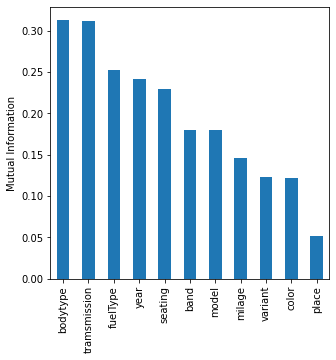

In [310]:
# mutual information
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(5, 5))
plt.ylabel('Mutual Information')